# Topic 3. Algebraic data types

## 3.1 Functions

This is a small introduction to functions from the point of view of functional programming _and_ software engineering. It ends with a discussion about the basic way in which functions are represented in an object-oriented programming language like Scala. These are the goals of this section:

* Understanding the difference between impure vs. pure functions: the main tenet of functional programming
* Understanding how functions act as a modularity mechanism: the software engineering perspective
* Introducing functions as values: enabling higher-order functions
* Currying and composition: HOFs in action as modularity mechanism
* Understanding _generic_ signatures: parametric polymorphism as another modularity mechanism
* Knowing how Scala represents function-values and different syntactic niceties


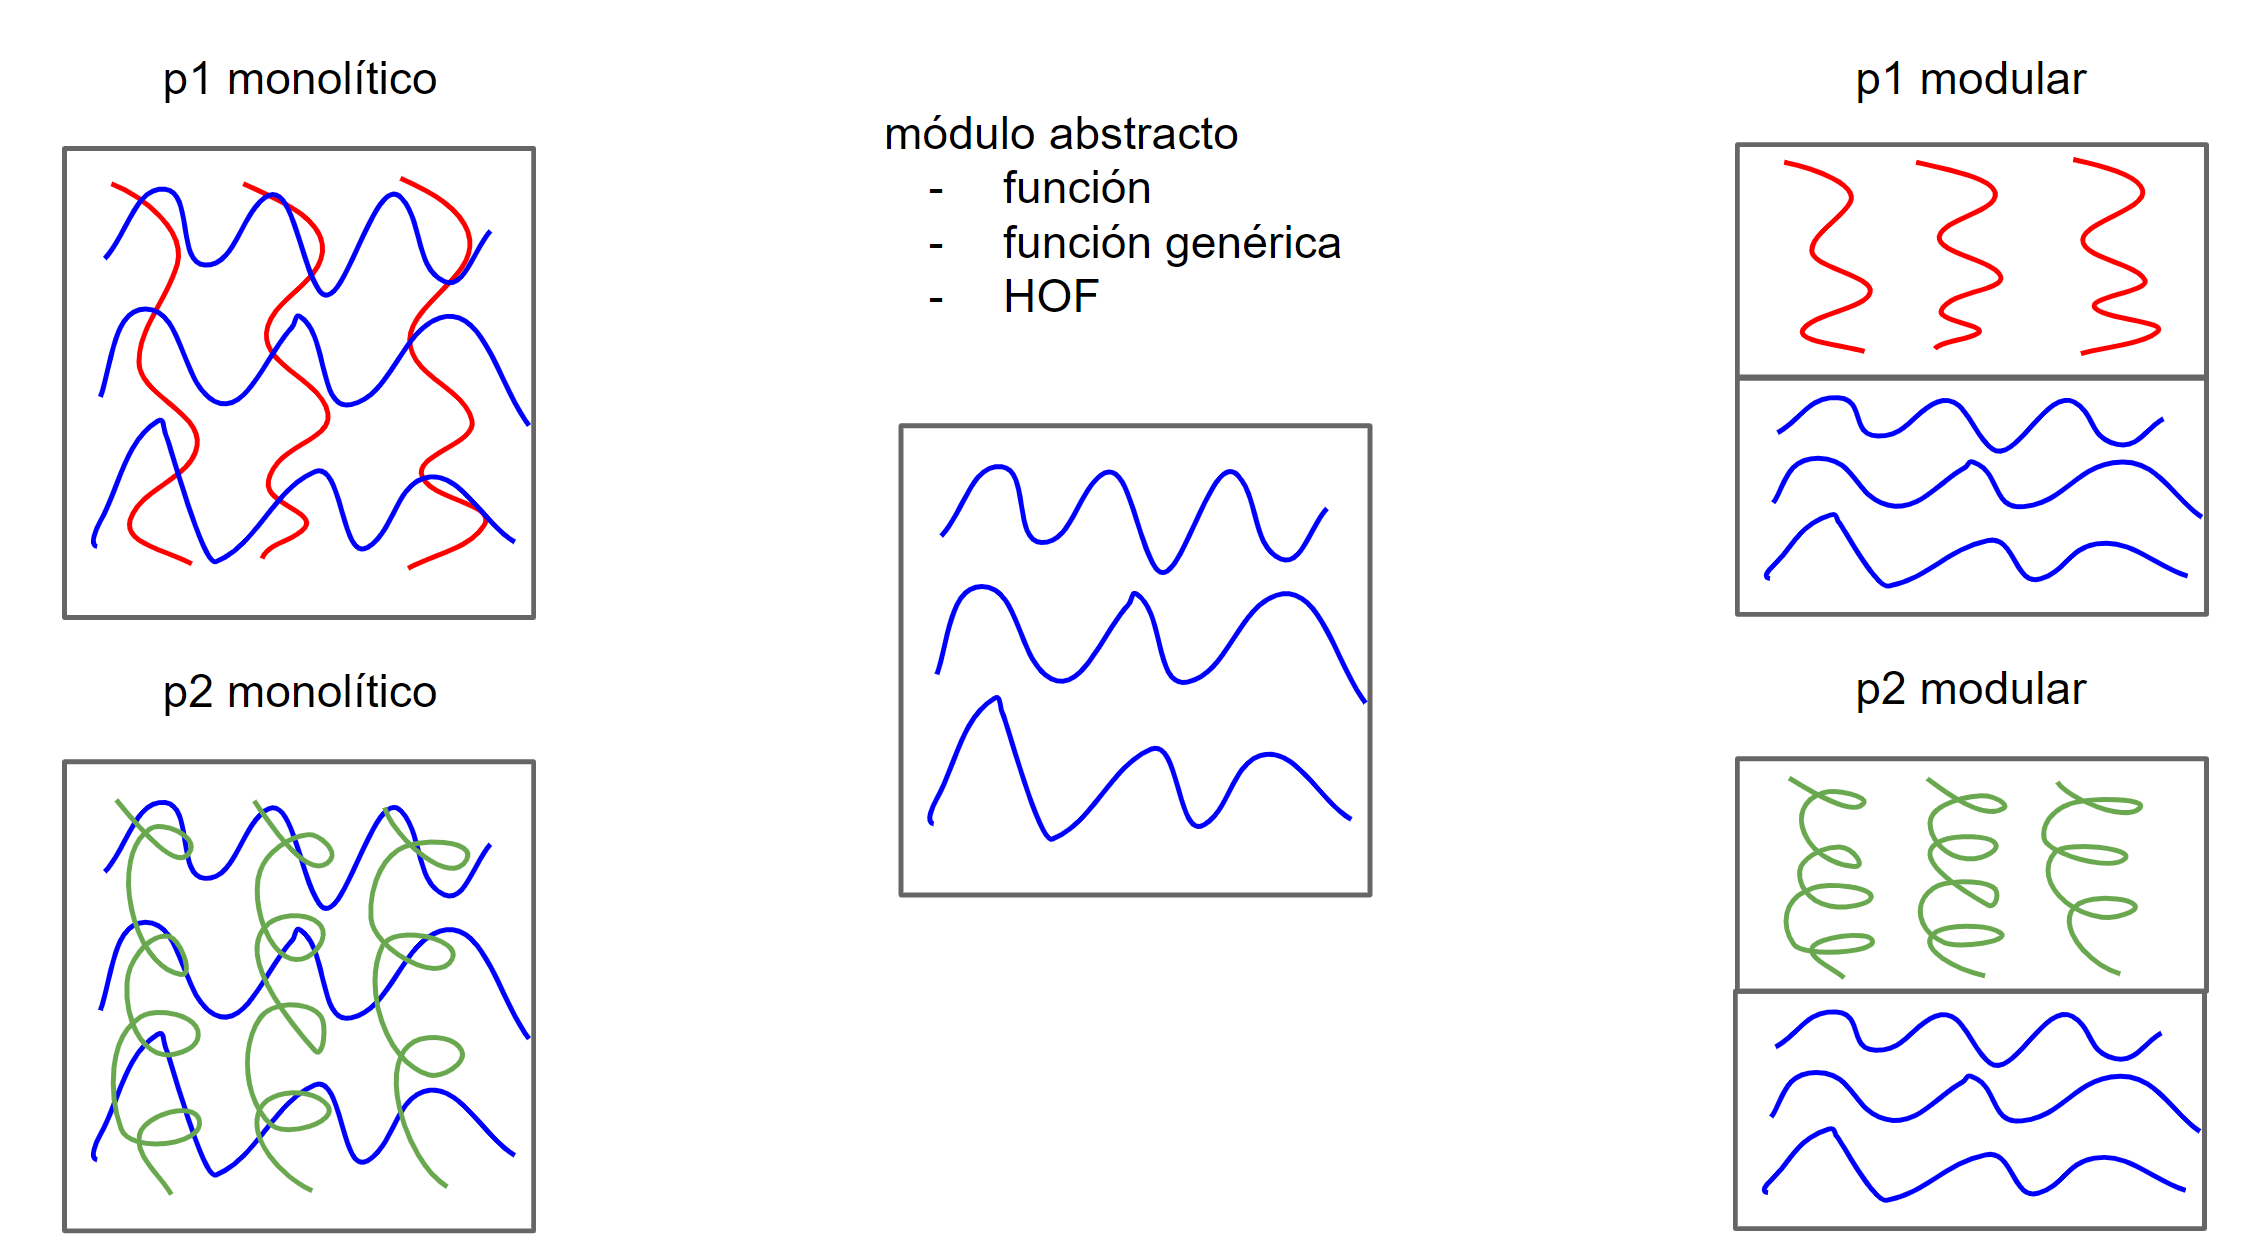


### References

_[Optional]_ __[Why Functional Programming Matters](https://www.cs.kent.ac.uk/people/staff/dat/miranda/whyfp90.pdf)__ John Hughes. This is a classic paper that motivates the need for functional programming by appealing to software enginerring principles such as modularity. It's written using the Miranda programming language, and it's more an academic paper that undergraduate material. Nevertheless, its reading is highly recommeded. Give it a try if you find some time!

__[Scala book (online)](https://docs.scala-lang.org/overviews/scala-book/introduction.html)__.

- [Pure functions](https://docs.scala-lang.org/overviews/scala-book/pure-functions.html)

## What are (pure) functions?

Functions are computational devices that transform input _values_ into output _values_, and do nothing _else_.

In [ ]:
// `add one` function



If we run this function, the only thing that happens is the computation of a new value:

Functions that do something else, besides returning values, are called _impure_ functions. Functional programming deals only with _pure_, or mathematical, functions.

In [ ]:
// An impure function
/*
def impureAdd(input: Int): Int = {
    input + 1
}
*/

If we run this function, we will see an _effect_ in the console (besides the pure computation of `input + 1`): 

There are many kinds of effects: writing to the console, reading from the keyworkd, reading from a socket, calling a web service, executing a query over the database, etc. Clearly, we need effects if we want our programs to do something useful, so pure functions alone are not enough. We will talk about this later on.



## Functions as modularity devices

Why are functions so important in programming? Because they help us to _modularize_ our code. For instance, let's consider the following programs, which access the following data structure of key-value pairs (we will talk about this structure in detail later on):

In [ ]:
val config: Map[String, String] = 
    Map("URL" -> "http://hablapps.com",
        "PORT" -> "8080")

Our first program access the configuration data for the value of the "URL" key. If it's not found, then the default value "default.url" is returned (similarly, we will discuss the `match` keyword further in the course).

In [ ]:
// Program 1
val url: String = config.get("URL") match {
  case Some(u) => u
  case None => "default.url"
}

Our second program accesses the configuration data for the value of the "PORT" key. If it's not found, then the default value "8080" is returned.

In [ ]:
// Program 2
val port: String = config.get("PORT") match {
  case Some(p) => p
  case None => "8080"
}

These two programs do _almost_ the same. The only differences lie in the particular keys and default values the programs refer to, but, otherwise, they do the same thing. However, this _common factor_ is not reflected in the code. Indeed, we may get one program from the other by copy-pasting, a clear signal of [code-smell](https://en.wikipedia.org/wiki/Code_smell).

These programs are _monolythic_, in the sense that they are not made by composing large enough modules. In this case, the common logic of the program and the values it operates on are intermingled in the same code. 

How can we abstract away the differences and package the common logic in a single module? With functions:

In [ ]:
/*
val port: String = config.get("PORT") match {
  case Some(p) => p
  case None => "8080"
}
*/

This is an abstract module which we can combine with other modules to get back the very same functionality:

In [ ]:
// Program 1
// val url: String = ???

In this case, we combine the module `getKeyFrom` with the modules (data values and variables, in particular) `config`, `"URL"` and `"default.url"`. The composition method is just simple function application.

Which are the advantages of using functions? As in the general case, having a more modular solution enables _reuse_, particularly of those modules which are abstract or parameterised. For instance, we can benefit from this level of reuse by re-implementing the `url` program in the following way:

In [ ]:
// Program 2
// val port: String = ???

## Functions as methods

In an object-oriented language, functions are implemented through _methods_, i.e. using the `def` keyword. Note that these methods are invariably part of an `object`, `class` or `trait` declaration. Typically, pure functions are declared as part of objects. For instance, we may declare a set of arithmetic functions as follows: 

In [ ]:
import scala.math.{pow, Pi}

object Areas{
    
    def circle(radius: Double): Double = 
        ???
    
    def rectangle(width: Double, height: Double): Double = 
        ???
}

In notebooks and the Scala REPL, `def` declarations appear to be independent from any object or class, but they are not:

In [ ]:
def foo(i: Int): Int = i
// show errors: "missing argument list for method foo in class Helper"


When we study higher-order functions, we will see that functions in Scala can also be represented as _objects_, i.e. not only as methods. However, that representation also builds essentially upon methods.

## Functions as values

Functions can also be represented as _values_, i.e. as objects. This allows us to implement functions that receive other functions as arguments, or return functions as results. This special functions are called _higher-order functions_ (HOF), and they feature as a great modularity device. We will mainly discuss this feature of HOFs in PF-3.

In order to represent functions as values, we need first to make extremely clear the difference between variables, values and types. For instance:


In [ ]:
// three variables


In these definitions, we found three variables: `i`, `s` and `b`. These variables are assigned three __values__: `3`, `"hi"` and `true`. The __types__ of these values are, respectively: `Int`, `String` and `Boolean`. Now, let's consider these other variables that we intend to represent values equivalent to the following function-methods:

In [ ]:
// Function-methods

def addOneM(number: Int): Int = 
    number + 1

def substractOneM(number: Int): Int = 
    number - 1 

// Function-values



Here, we also have variables, values and types. The two variables are named `addOneV` and `substractOneV`. They are assigned the _function values_ `(a: Int) => a+1` and `(a: Int) => a - 1`. The type of these values is the same _function type_ `Int => Int`. A function-value is also known as a _lambda expression_. Note that a function value is made of two parts: the input arguments and the function body: `(...input...) => body`. The input arguments declare new variables, each of them of a particular type, that will be assigned to certain values when they are passed to the function (upon invocation). The function body has to be an expression of the type specified as output by the function type.

Function-values are equivalent to function-methods in the sense that they behave exactly in the same way, i.e. they allow us to compute values from other values that we pass as input:

In [ ]:
// function-method invocations
// addOneV(5)
// addOneM(5)
// equivalent invocations with function-values


## Higher-order functions

But then, which are the advantages of function values? Basically, they allow us to implement higher-order functions (HOFs), i.e. functions that receive and/or return other functions. For instance, let's say that we want to implement a HOF that receives an integer-to-integer function, such as `addOneM`and `substractOneM`, and calls this function over a given number. We may want to write something like this:

In [ ]:
// def call(def int2int(n: Int): Int, number: Int): Int =
//   ...

where the first argument `int2int` attempts to represent any function that receives an integer and returns another integer. 

But this code is not legal in Scala, because arguments to functions need to be values, not methods. That's why we need function-values!

In [ ]:
// def call(def int2int(n: Int): Int, number: Int): Int =
//   ...

which we can use as follows:

In [ ]:
// invoke call


And we can even pass function-methods that are converted on the fly to function-values!

In [ ]:
// invoke call with function-methods


This conversion is the so-called _eta-expansion_.

## Currying

What about functions that receive more than one argument? We would like to implement the function-value equivalent of this function-method: 

In [ ]:
// function-method sum


We do that as follows:

In [ ]:
// function-value sum



or, exploiting type inference:

In [ ]:
// function-value sum, with type-inference

However, function types of two, three, ... arguments are not extrictly necessary, and sometimes we can get along with functions of one argument. But, how can we create a function of two arguments with functions of one argument alone?  HOFs to the rescue! The trick is the following:

In [ ]:
// function-value sum, currified


Note that brackets in `Int => (Int => Int)` are used for clarity, but are not needed. Basically, we created a function of one argument that returns another function of one argument. So, the expression: 

In [ ]:
// partial application


returns a function that can be applied again:

In [ ]:
// total application


We can apply this strategy to functions of any number of arguments. This is called _currying_ and _currified functions_. The analog in function-methods is [multiple-parameter lists](https://docs.scala-lang.org/tour/multiple-parameter-lists.html):

In [ ]:
// function-method, with multi-parameter list


## Functions compose

We can create new functions by composing other functions whose signatures match. This is great from a modularity perspective. For instance, the following function is implemented in a non-modular way:

In [ ]:
// isEvenLength


This function is somehow the combination of two more basic functions `length` and `isEven`:

In [ ]:
// length 


In [ ]:
// isEven


We can observe the same pattern in the following function:

In [ ]:
// isOddNumber


which somehow is made up of functions `_.toInt` and `isOdd`: 

In [ ]:
// _.toInt 


// isOdd 



However, the composition pattern is _not_ explicit in the implementations of the `isEvenLength` and `isOddNumber` functions . How can we redefine these functions using its function components (`length` and `isEven`, and `_.toInt` and `isOdd`, respectively)? We can use a HOF which helps us to compose functions:

In [ ]:
// compose HOF


Then, we can redefine `isEvenLength` in a modular way from the `length` and `isEven` building blocks:

In [ ]:
// val isEvenLength: String => Boolean = ???

Similarly, the redefinition of the `isOddNumber` function would be as follows:

In [ ]:
// val isOddNumber: String => Boolean = ???


The HOF `compose` is actually defined for function types of one argument: 

In [ ]:
// val isEvenLength: String => Boolean = ???

or using infix notation:

In [ ]:
// val isEvenLength: String => Boolean = ???

Note that a similar function to `compose`, called `andThen`, is also available in the standard library: 

In [ ]:
// val isEvenLength: String => Boolean = ???

## Generics, aka parametric polymorphism

What if we want to apply the composition pattern to this function?

In [ ]:
// firstDigit function


In this case, we are composing implicitly the following functions: 

In [ ]:
// _.toString

// _.apply(0)



Alas, we can't reuse our current `compose` function, because its implementation is _monomorphic_, i.e. it only works with specific types, namely, functions of types `String => Int` and `Int => Boolean`. Can we obtain a more generic version of `compose` which allows us to compose functions of arbitrary types? Parametric polymorphism to the rescue!

In [ ]:
def compose(f2: Int => Boolean, f1: String => Int): String => Boolean = 
    (a: String) => f2(f1(a))

Note that `A`, `B` and `C` are parameters of the function `compose`, much in the same way that parameters `f1` and `f2`. In the former case, they are _type_ parameters, and in the latter case they are _value_ parameters. But they are parameters nonetheless. 

We can also give a currified version of this function as follows:

In [ ]:
// compose currified


Last, there is a function which behaves as the identity element with respect to the operation `compose`, i.e. no matter which other function we choose to compose with the [`identity`](https://www.scala-lang.org/api/current/scala/Predef$.html) function, the result will be that function:
1. `identity[B] compose f == f` for all `f: A => B`
2. `f compose identity[A] == f` for all `f: A => B`

In [ ]:
// function-method identity


or using lambda expressions:

In [ ]:
// quasi function-value identity


## Syntactic sugar for function-values

We discuss now some syntactic facilities offered by Scala when writing lambda expressions. 

First, we can omit the types of input arguments and let Scala figure out them:

In [ ]:
val addOneV: Int => Int = 
    (a: Int) => a + 1

val substractOneV: Int => Int = 
    (a: Int) => a - 1

Second, we can get extra level of conciseness using so-called _underscore_ syntax:

In [ ]:
val addOne: Int => Int = 
    (a: Int) => a + 1

In [ ]:
// call((a: Int) => a + 1, 5)
// call((a: Int) => a - 1, 3)

This kind of syntactic sugar also applies to functions of more than one argument: 

In [ ]:
val sum: (Int, Int) => Int = 
    (a: Int, b: Int) => a + b

## How are functions represented as values in Scala

Now, we just want to focus on how are functions actually represented as values in a OO language like Scala. This representation builds essentially upon methods, in particular, _reified_ methods. For instance, let's consider the following functions:

In [ ]:
def addOneM(number: Int): Int = 
    number + 1

def substractOneM(number: Int): Int = 
    number - 1 

In order to create a type of functions that receive an integer and return another one, we can create a new class whose only method is the function that we want to actually implement:

In [ ]:
// FunctionInt2Int class 


Now, we can implement the `call` HOF as follows: 

In [ ]:
// call HOF


In order to use this HOF with the `addOneM` and `substractOneM` functions, we must create reified versions for them: 

In [ ]:
// addOneV and SubstractV function-values


We call the `addOneV` and `substractOneV` function-values, i.e. functions represented as values. Now, we can use the `call` HOF as follows:

In [ ]:
// invoke call HOF

Actually, function types such as `Int => Int` and `Boolean => String` are syntactic sugar for the types `Function1[Int, Int]` and `Function1[Boolean, String]`, where [`Function1`](https://www.scala-lang.org/api/current/scala/Function1.html) is a generalization of the type `FunctionInt2Int` that we wrote above. We have also [`Function2`](https://www.scala-lang.org/api/current/scala/Function2.html), [`Function3`](https://www.scala-lang.org/api/current/scala/Function3.html), etc., that are roughly implemented as follows:

In [ ]:
object Std{
    trait Function1[A, B]{
        def apply(a: A): B
    }

    trait Function2[A, B, C]{
        def apply(a: A, b: B): C
    }

    // up to Function22
}


Using these standard classes, we can create the `addOneV` function-value in a similar way than before: 

In [ ]:
// addOneV as a Function1 instance


and invoke functions as follows:


In [ ]:
// invoke addOneV


However, as we saw throughout this notebook, we can also invoke the function without explicitly naming the `apply` method, i.e. 

In [ ]:
// omit apply!


This is just another syntactic nicety of Scala. In sum, in an object-oriented language like Scala, function-values are ultimately methods in disguise.